In [1]:
# import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv(r'C:\Users\User\Documents\juputer\salary_data.csv')
data.head()

,employee_id,experience_years,salary
0,EM_101,16.8,3166.9
1,EM_102,10.7,3126.9
2,EM_103,14.1,3278.8
3,EM_104,9.1,2828.8
4,EM_105,8.9,2728.7


### Exploratory Data Analysis

In [3]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   employee_id       100 non-null    object 
 1   experience_years  100 non-null    float64
 2   salary            100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


In [4]:
# Display data description
data.describe()

,experience_years,salary
count,100.000000,100.000000
mean,10.032000,2663.418000
std,5.804733,664.867378
min,0.000000,1046.400000
25%,5.025000,2192.750000
50%,10.000000,2984.150000
75%,14.975000,3174.500000
max,20.000000,3405.800000


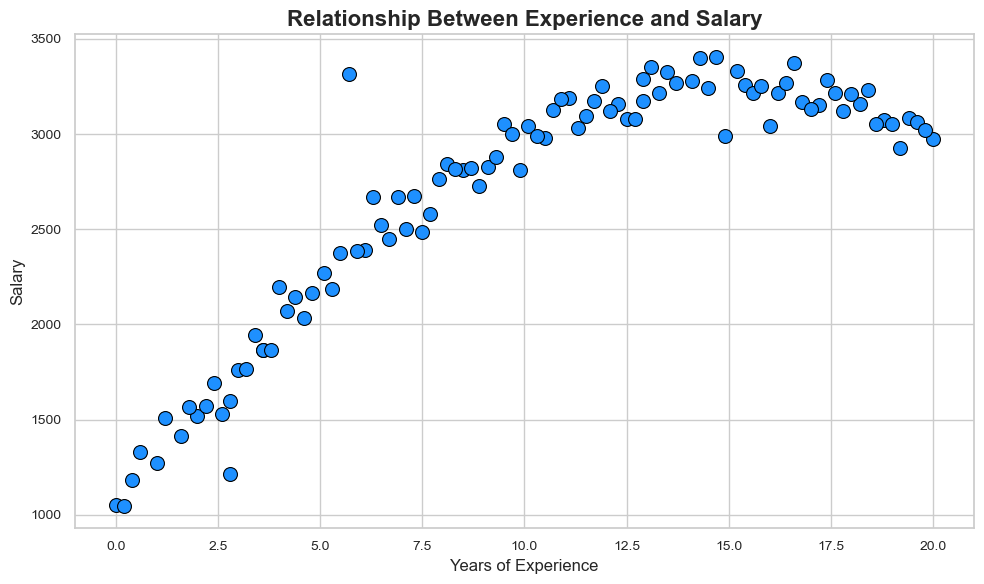

In [5]:
# Set seaborn theme
sns.set_theme(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['experience_years'], y=data['salary'],
                color="dodgerblue", s=100, edgecolor="black")

# Add titles and labels
plt.title('Relationship Between Experience and Salary', fontsize=16, fontweight='bold')
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)

# Enhance plot aesthetics
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


### Data Preparation
1. Check Duplicated Data
2. Check Missing Value Handling
3. Encoding categorical : change string (categorical) into numerical -> in this dataset, there is no categorical column.

In [6]:
df = data.copy()

In [7]:
#Check Duplicated Data
print("Data Sebelum Pemeriksaan Duplikat:")
print(df.shape)

Data Sebelum Pemeriksaan Duplikat:
(100, 3)


In [8]:
duplicated_rows = df[df.duplicated(keep=False)]
duplicated_rows

,employee_id,experience_years,salary
10,EM_111,3.6,1867.9
42,EM_111,3.6,1867.9


In [9]:
df = df.drop_duplicates()

In [10]:
print("\nData Setelah Pemeriksaan Duplikat:")
print(df.shape)


Data Setelah Pemeriksaan Duplikat:
(99, 3)


In [11]:
#Check missing value
df.isna().sum()

employee_id         0
experience_years    0
salary              0
dtype: int64

In [12]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':  
        df[column] = label_encoder.fit_transform(df[column])

### Splitting the data

In [13]:
# Creating X and y
X = df[['experience_years']]
y = df['salary']
X

,experience_years
0,16.8
1,10.7
2,14.1
3,9.1
4,8.9
...,...
95,12.1
96,14.3
97,2.8
98,18.6


In [14]:
X

,experience_years
0,16.8
1,10.7
2,14.1
3,9.1
4,8.9
...,...
95,12.1
96,14.3
97,2.8
98,18.6


In [15]:
y

0     3166.9
1     3126.9
2     3278.8
3     2828.8
4     2728.7
       ...  
95    3119.2
96    3399.5
97    1596.0
98    3051.2
99    2990.9
Name: salary, Length: 99, dtype: float64

In [16]:
# Split the data for train and test
# train : test = 75 : 25 atau 80 : 20 atau 70:30 atau 85:15 , size train > test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

In [17]:
X_train.shape

(74, 1)

In [18]:
X_test.shape

(25, 1)

In [19]:
# Reshape because we only have single features.
# This is not needed if our features is 2 or more
X_train_reshape = X_train.values.reshape(-1, 1)
X_test_reshape = X_test.values.reshape(-1, 1)

In [20]:
model_lr = LinearRegression()
model_lr.fit(X_train_reshape, y_train)

LinearRegression()

In [21]:
y_test_pred = model_lr.predict(X_test_reshape)
y_test_pred

array([2539.18209742, 2663.01880085, 3117.08671345, 1889.03940439,
       3560.83490076, 2724.93715257, 3034.52891116, 3622.75325247,
       2012.87610782, 3375.0798456 , 2621.73989971, 2312.14814112,
       2931.3316583 , 2477.2637457 , 2033.5155584 , 2559.82154799,
       2188.31143769, 3158.36561459, 3457.63764789, 3684.67160419,
       2136.71281126, 2497.90319628, 3664.03215362, 1930.31830553,
       1971.59720668])

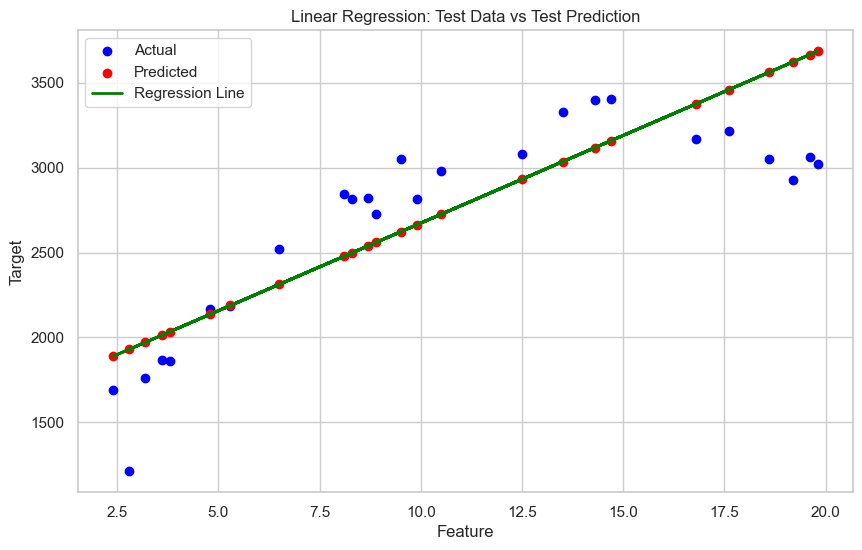

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_test_pred, color='red', label='Predicted')
plt.plot(X_test, y_test_pred, color='green', label='Regression Line', linewidth=2)  # Line for predicted values
plt.title('Linear Regression: Test Data vs Test Prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Check error rate between train_data prediction and test_data prediction
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model_lr.predict(X_test_reshape)
y_train_pred = model_lr.predict(X_train_reshape)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"""
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
  Gap  : {abs(mse_train - mse_test):.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)


Mean Squared Error:
  Train: 107699.85
  Test : 128111.12
  Gap  : 20411.27
R^2 Score:
  Train: 0.77
  Test : 0.63
      


In [24]:
# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',model_lr.intercept_)
print('Coefficient of the line Linear Regression:',model_lr.coef_)

Intercept of the Linear Regression model: 1641.365997520288
Coefficient of the line Linear Regression: [103.19725286]


In [30]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

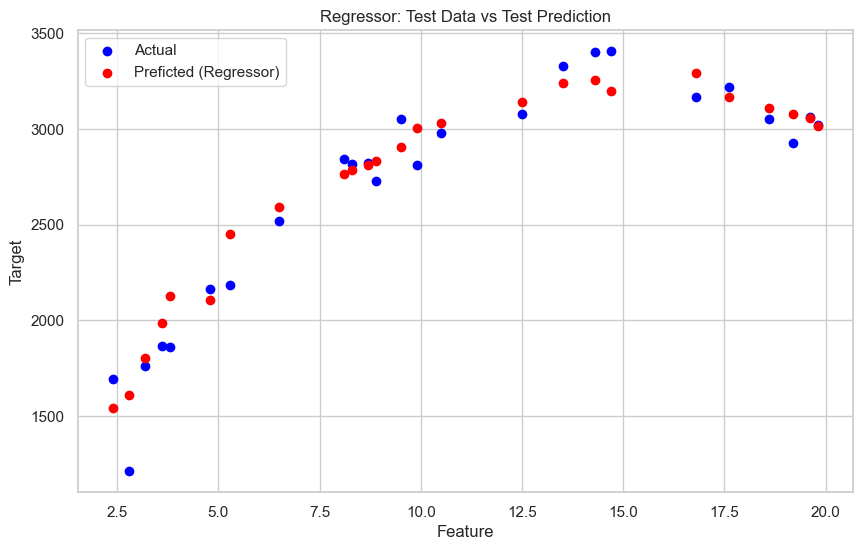

In [31]:
y_pred_dt = model_rf.predict(X_test_reshape)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_dt, color='red', label='Preficted (Regressor)')
plt.title('Regressor: Test Data vs Test Prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Check error rate between train_data prediction and test_data prediction
from sklearn.metrics import mean_squared_error, r2_score

y_test_pred = model_rf.predict(X_test_reshape)
y_train_pred = model_rf.predict(X_train_reshape)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"""
Mean Squared Error:
  Train: {mse_train:.2f}
  Test : {mse_test:.2f}
  Gap  : {abs(mse_train - mse_test):.2f}
R^2 Score:
  Train: {r2_train:.2f}
  Test : {r2_test:.2f}
      """)


Mean Squared Error:
  Train: 3737.44
  Test : 21744.73
  Gap  : 18007.29
R^2 Score:
  Train: 0.99
  Test : 0.94
      


In [33]:
# Saving the model
import joblib
joblib.dump(model_rf, 'RandomForestRegressor_model.pkl')

['RandomForestRegressor_model.pkl']

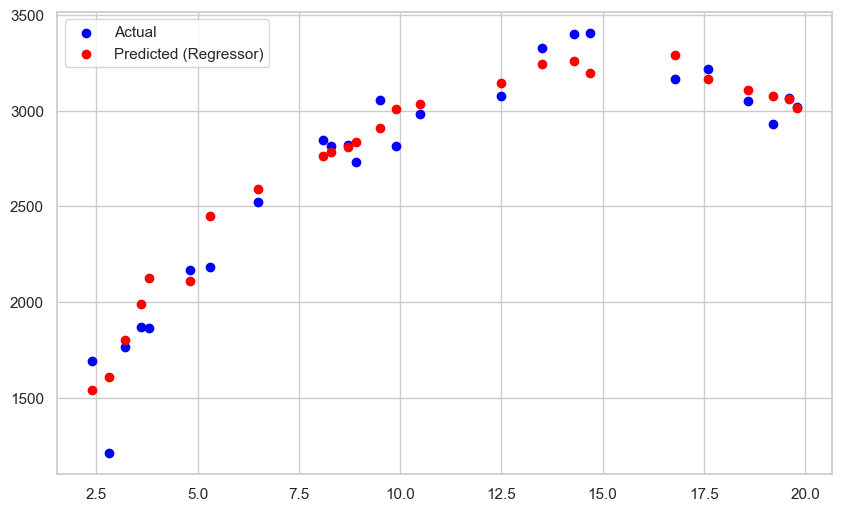

In [34]:
# Reading the model
loaded_model = joblib.load('RandomForestRegressor_model.pkl')

# Testing the model
y_pred_load = loaded_model.predict(X_test_reshape)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_load, color='red', label='Predicted (Regressor)')
plt.legend()
plt.show()

## Terima Kasih